```{contents}
```

# Ridge Regression

Ridge is a type of **regularized linear regression** that adds an **L2 penalty** (squared magnitude of coefficients) to the loss function.

* It helps control **overfitting** by shrinking coefficients.
* Unlike Lasso, Ridge does **not set coefficients to zero** → all features are kept but with smaller weights.

---

## The L2 Regularization Formula

Ordinary Least Squares (OLS) minimizes:

$$
\text{Loss}_{OLS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Ridge Regression modifies it:

$$
\text{Loss}_{Ridge} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
$$

Where:

* $\lambda$ = regularization strength (hyperparameter).
* $\beta_j^2$ = squared coefficients (L2 penalty).
* Intercept ($\beta_0$) is not penalized.

---

## Effect of L2 Penalty

* **If λ = 0** → Ridge = OLS (no shrinkage).
* **If λ is small** → coefficients shrink slightly.
* **If λ is large** → coefficients shrink strongly but never reach exactly zero.

---

## Why Ridge Never Zeros Out Coefficients

The L2 penalty creates a **circular/elliptical constraint region**.

* Optimization prefers to **spread weights across features** instead of eliminating them.
* So, Ridge is good when **all features contribute a little**.

---

## When to Use Ridge

✅ When you have **multicollinearity** (features are correlated).
✅ When you don’t want to remove features but want to **reduce variance**.
✅ Works best when many features have **small to medium influence**.

---

## Visual Intuition

* Ridge forces coefficients to lie inside a **circle (or sphere in higher dimensions)**.
* Because circles have no sharp corners, coefficients get shrunk smoothly, never exactly zero.

---

**Key difference vs Lasso (L1):**

* Ridge shrinks coefficients continuously but **keeps all features**.
* Lasso can shrink some coefficients to **exactly zero → feature selection**.


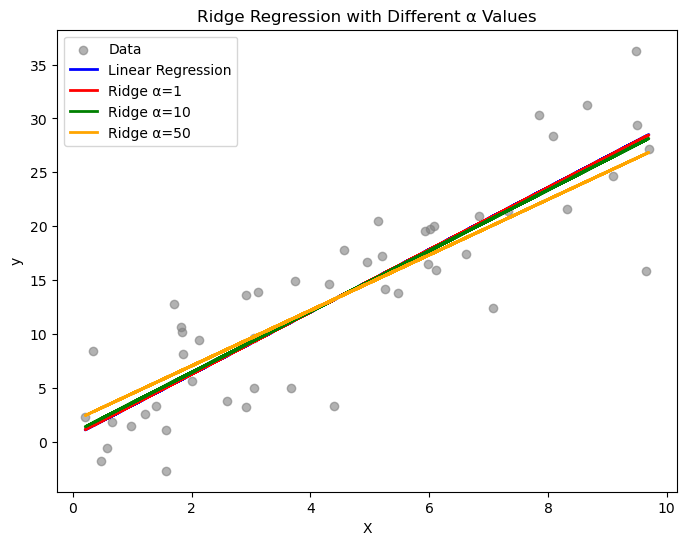

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 1) * 10
y = 3 * X.squeeze() + np.random.randn(50) * 5

# Fit Linear Regression (no regularization)
lin_reg = LinearRegression().fit(X, y)

# Fit Ridge Regression with different alpha values
ridge1 = Ridge(alpha=1).fit(X, y)
ridge10 = Ridge(alpha=10).fit(X, y)
ridge50 = Ridge(alpha=50).fit(X, y)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
plt.plot(X, lin_reg.predict(X), label="Linear Regression", color="blue", linewidth=2)
plt.plot(X, ridge1.predict(X), label="Ridge α=1", color="red", linewidth=2)
plt.plot(X, ridge10.predict(X), label="Ridge α=10", color="green", linewidth=2)
plt.plot(X, ridge50.predict(X), label="Ridge α=50", color="orange", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression with Different α Values")
plt.legend()
plt.show()

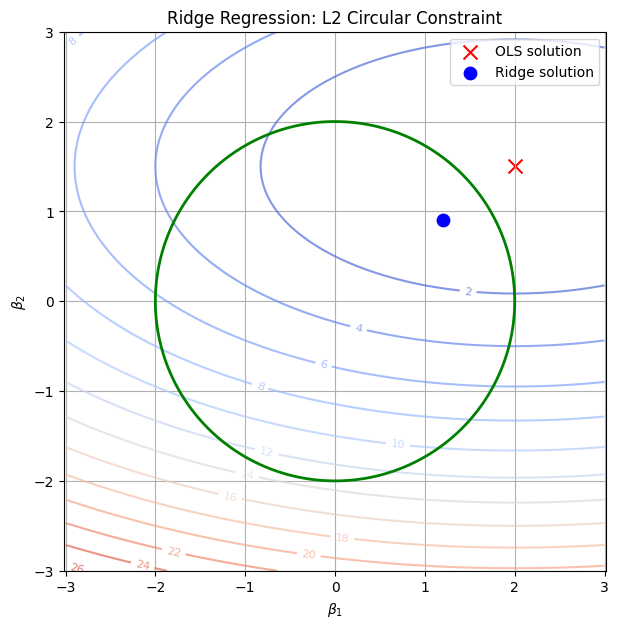

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Create grid of coefficients
beta1 = np.linspace(-3, 3, 400)
beta2 = np.linspace(-3, 3, 400)
B1, B2 = np.meshgrid(beta1, beta2)

# Ridge constraint (circle): beta1^2 + beta2^2 <= t
circle = B1**2 + B2**2

# Example OLS solution (unregularized minimum)
ols_point = np.array([2.0, 1.5])

# Simulated contour of RSS (elliptical error surface)
rss = (B1 - ols_point[0])**2/4 + (B2 - ols_point[1])**2

plt.figure(figsize=(7,7))

# RSS contours
cs = plt.contour(B1, B2, rss, levels=15, cmap="coolwarm", alpha=0.7)
plt.clabel(cs, inline=1, fontsize=8)

# Ridge constraint region (circle)
plt.contour(B1, B2, circle, levels=[2**2], colors="green", linewidths=2, label="L2 constraint")

# Mark OLS solution
plt.scatter(*ols_point, color="red", marker="x", s=100, label="OLS solution")

# Approx Ridge solution (where ellipse first touches circle)
ridge_point = np.array([1.2, 0.9])
plt.scatter(*ridge_point, color="blue", marker="o", s=80, label="Ridge solution")

plt.xlabel(r"$\beta_1$")
plt.ylabel(r"$\beta_2$")
plt.title("Ridge Regression: L2 Circular Constraint")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()
